## Background Reading
LATIMES https://www.latimes.com/projects/la-me-freeway-how-close-map/

https://www.latimes.com/local/lanow/la-me-ln-freeway-building-pollution-20161107-story.html

https://www.latimes.com/projects/la-me-freeway-pollution/



In [1]:
import geosnap

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
from geosnap import datasets

In [3]:
dir(datasets)

['acs',
 'blocks_2000',
 'blocks_2010',
 'codebook',
 'counties',
 'ejscreen',
 'ltdb',
 'msa_definitions',
 'msas',
 'ncdb',
 'nces',
 'show_data_dir',
 'states',
 'tracts_1990',
 'tracts_2000',
 'tracts_2010']

In [4]:
datasets.tracts_2000().head()

geoid  median_contract_rent  median_home_value  \
0  25009266400                   662             172400   
1  25009267102                   653             169200   
2  25009266200                   662             163200   
3  25009267101                   624             179200   
4  25009266100                   569             215200   

   median_household_income  median_income_asianhh  median_income_blackhh  \
0                    53314                  48750                  22500   
1                    50739                  46250                      0   
2                    49315                  90457                 101277   
3                    45625                      0                  54545   
4                    60677                  48750                  43750   

   median_income_hispanichh  median_income_whitehh  n_age_5_older  \
0                         0                  53808           3065   
1                         0                  51264           4311   
2                     26250                  48150           5131   
3                     38750                  44750           3011   
4                     32500                  61224           3643   

   n_asian_age_distribution  ...  p_vacant_housing_units  p_veterans  \
0                         7  ...                    3.74        9.84   
1                        23  ...                    3.22       13.42   
2                        37  ...                    3.30        9.10   
3                        11  ...                   42.08        9.96   
4                        20  ...                    3.74       10.31   

   p_vietnamese_persons  p_white_over_60  p_white_over_65  p_white_under_15  \
0                  0.03            14.59            11.04             21.40   
1                  0.06            13.77             9.67             21.02   
2                  0.07            13.44            10.63             22.38   
3                  0.00            19.89            14.78             16.97   
4                  0.23            14.44            10.77             22.19   

   p_widowed_divorced  per_capita_income  \
0               17.61              24288   
1               18.91              20946   
2               20.74              21817   
3               27.61              22578   
4               15.48              28030   

                                            geometry  year  
0  POLYGON ((-70.91490 42.88659, -70.90996 42.872...  2000  
1  POLYGON ((-70.91490 42.88659, -70.91489 42.886...  2000  
2  POLYGON ((-70.93080 42.88459, -70.92950 42.874...  2000  
3  POLYGON ((-70.82469 42.87092, -70.82421 42.871...  2000  
4  POLYGON ((-70.97460 42.86775, -70.97290 42.863...  2000  

[5 rows x 192 columns]

In [5]:
geosnap.io.store_census()

Loading manifest: 100%|███████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2.44k/s]
Copying objects: 100%|████████████████████████████████████████████████████████████| 2.28M/2.28M [00:03<00:00, 591kB/s]


Loading manifest: 100%|███████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 9.85k/s]
Copying objects: 100%|██████████████████████████████████████████████████████████████| 428k/428k [00:01<00:00, 406kB/s]

Data stored in /Users/serge/Library/Application Support/geosnap


In [6]:
from geosnap import Community

In [7]:
Community.from_census?

Signature:
Community.from_census(
    datastore=None,
    state_fips=None,
    county_fips=None,
    msa_fips=None,
    fips=None,
    boundary=None,
    years='all',
    constant_dollars=True,
    currency_year=2015,
)
Docstring:
Create a new Community from original vintage US Census data.

   Instiantiate a new Community from . To use
   you must first download and register census data with geosnap using
   the `store_census` function. Pass lists of states, counties, or any
   arbitrary FIPS codes to create a community. All fips code arguments
   are additive, so geosnap will include the largest unique set.
   Alternatively, you may provide a boundary to use as a clipping
   feature.

Parameters
----------
state_fips : list or str, optional
    string or list of strings of two-digit fips codes defining states
    to include in the study area.
county_fips : list or str, optional
    string or list of strings of five-digit fips codes defining
    counties to include in the study area.


In [8]:
sd = Community.from_census(county_fips='06073')

In [9]:
sd.gdf.shape

(1671, 195)

In [10]:
sd.gdf.head()

geoid  n_mexican_pop  n_cuban_pop  n_puerto_rican_pop  \
0  06073019000         5094.0          2.0                 5.0   
1  06073018700        30479.0         72.0               611.0   
2  06073019101         2497.0          0.0                 9.0   
3  06073020901         4839.0          7.0                 5.0   
4  06073021000         2337.0          0.0                15.0   

   n_total_housing_units  n_vacant_housing_units  n_occupied_housing_units  \
0                 2326.0                   184.0                    2142.0   
1                 4819.0                    50.0                    4769.0   
2                 1497.0                   154.0                    1343.0   
3                 3042.0                   995.0                    2047.0   
4                 2457.0                  1154.0                    1303.0   

   n_owner_occupied_housing_units  n_renter_occupied_housing_units  \
0                          1769.0                            373.0   
1                           250.0                           4519.0   
2                           858.0                            485.0   
3                          1430.0                            617.0   
4                           979.0                            324.0   

   n_white_persons  ...  p_irish_born_pop  p_italian_born_pop  \
0        4898911.0  ...               NaN                 NaN   
1      215361577.0  ...               NaN                 NaN   
2       16221375.0  ...               NaN                 NaN   
3        4416241.0  ...               NaN                 NaN   
4        2302215.0  ...               NaN                 NaN   

   p_poverty_rate_children  p_poverty_rate_hispanic  p_russian_born_pop  \
0                      NaN                      NaN                 NaN   
1                      NaN                      NaN                 NaN   
2                      NaN                      NaN                 NaN   
3                      NaN                      NaN                 NaN   
4                      NaN                      NaN                 NaN   

   p_scandanavian_born_pop  p_scandanavian_pop  n_total_pop_sample  \
0                      NaN                 NaN                 NaN   
1                      NaN                 NaN                 NaN   
2                      NaN                 NaN                 NaN   
3                      NaN                 NaN                 NaN   
4                      NaN                 NaN                 NaN   

   p_female_labor_force  p_black_persons  
0                   NaN              NaN  
1                   NaN              NaN  
2                   NaN              NaN  
3                   NaN              NaN  
4                   NaN              NaN  

[5 rows x 195 columns]

In [11]:
sd.gdf.columns.values

array(['geoid', 'n_mexican_pop', 'n_cuban_pop', 'n_puerto_rican_pop',
       'n_total_housing_units', 'n_vacant_housing_units',
       'n_occupied_housing_units', 'n_owner_occupied_housing_units',
       'n_renter_occupied_housing_units', 'n_white_persons',
       'n_nonhisp_white_persons', 'n_black_persons',
       'n_nonhisp_black_persons', 'n_hispanic_persons',
       'n_native_persons', 'n_hawaiian_persons', 'n_asian_indian_persons',
       'n_chinese_persons', 'n_filipino_persons', 'n_japanese_persons',
       'n_korean_persons', 'n_asian_persons', 'n_vietnamese_persons',
       'n_white_age_distribution', 'n_white_under_15', 'n_white_over_60',
       'n_white_over_65', 'n_black_age_distribution', 'n_black_under_15',
       'n_black_over_60', 'n_black_over_65',
       'n_hispanic_age_distribution', 'n_hispanic_under_15',
       'n_hispanic_over_60', 'n_hispanic_over_65',
       'n_native_age_distribution', 'n_native_under_15',
       'n_native_over_60', 'n_native_over_65', 'n_asia

In [12]:
gdf = sd.gdf

In [13]:
gdf.year

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
1666    2010
1667    2010
1668    2010
1669    2010
1670    2010
Name: year, Length: 1671, dtype: int64

In [14]:
gdf2010 = gdf[gdf.year==2010]

<AxesSubplot:>

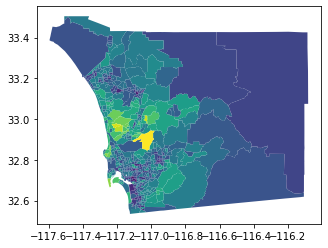

In [15]:
gdf2010.plot(column='median_income_whitehh')

<AxesSubplot:>

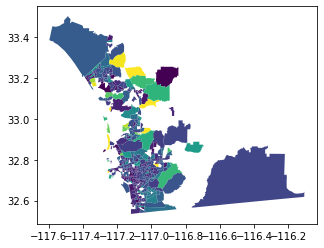

In [16]:
gdf2010.plot(column='median_income_blackhh')

## Road data

https://catalog.data.gov/dataset/tiger-line-shapefile-2015-state-california-primary-and-secondary-roads-state-based-shapefile

In [17]:
import geopandas

In [18]:
roads = geopandas.read_file("zip://./data/tl_2015_06_prisecroads.zip")

In [19]:
roads.head()

LINEARID        FULLNAME RTTYP  MTFCC  \
0  1104259565571   Roseville Byp     M  S1200   
1  1104259379281     Lincoln Byp     M  S1200   
2  1104259565578   Roseville Byp     M  S1200   
3  1104259164173   Roseville Byp     M  S1200   
4  1105061248705  I- 5 Local Byp     I  S1200   

                                            geometry  
0  LINESTRING (-121.29981 38.83064, -121.29981 38...  
1  LINESTRING (-121.30007 38.83959, -121.30006 38...  
2  LINESTRING (-121.30032 38.81729, -121.30032 38...  
3  LINESTRING (-121.30008 38.83927, -121.30007 38...  
4  LINESTRING (-117.24025 32.92973, -117.24024 32...

<AxesSubplot:>

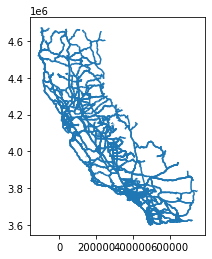

In [59]:
roads.plot()

## Clipping

In [21]:
gdf2010.head()

geoid  n_mexican_pop  n_cuban_pop  n_puerto_rican_pop  \
1044  06073014901          634.0          0.0                34.0   
1045  06073000300          555.0          0.0                13.0   
1046  06073000800          654.0          0.0                 0.0   
1047  06073002201         2336.0          0.0                 0.0   
1048  06073018509         3134.0         18.0                29.0   

      n_total_housing_units  n_vacant_housing_units  n_occupied_housing_units  \
1044                 1876.0                   131.0                    1745.0   
1045                 3046.0                   397.0                    2649.0   
1046                 2702.0                   253.0                    2449.0   
1047                 1321.0                    76.0                    1245.0   
1048                 1701.0                   172.0                    1529.0   

      n_owner_occupied_housing_units  n_renter_occupied_housing_units  \
1044                           757.0                            988.0   
1045                           635.0                           2014.0   
1046                           728.0                           1721.0   
1047                           161.0                           1084.0   
1048                           311.0                           1218.0   

      n_white_persons  ...  p_irish_born_pop  p_italian_born_pop  \
1044              NaN  ...          0.000000            0.000000   
1045              NaN  ...          0.000000            0.864118   
1046              NaN  ...          0.277497            0.000000   
1047              NaN  ...          0.000000            0.000000   
1048              NaN  ...          0.000000            0.000000   

      p_poverty_rate_children  p_poverty_rate_hispanic  p_russian_born_pop  \
1044                 4.375000                 4.719480            0.529355   
1045                 7.563025                 4.280328            2.419529   
1046                 4.703833                 3.340081            0.277497   
1047                36.750000                19.249181            0.000000   
1048                17.883212                17.466338            0.000000   

      p_scandanavian_born_pop  p_scandanavian_pop  n_total_pop_sample  \
1044                      0.0            6.400385                 NaN   
1045                      0.0            3.802117                 NaN   
1046                      0.0            3.178607                 NaN   
1047                      0.0            0.000000                 NaN   
1048                      0.0            0.901239                 NaN   

      p_female_labor_force  p_black_persons  
1044             59.290001        65.160004  
1045             69.050003        72.800003  
1046             72.440002        59.060001  
1047             49.259998         9.630000  
1048             55.110001        23.129999  

[5 rows x 195 columns]

In [22]:
sdcounty = gdf2010.unary_union

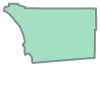

In [23]:
sdcounty

In [24]:
type(sdcounty)

shapely.geometry.polygon.Polygon

In [25]:
gdf2010.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
roads.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [27]:
roads.estimate_utm_crs()

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gdf2010.estimate_utm_crs()

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
gdf2010 = gdf2010.to_crs(gdf2010.estimate_utm_crs())

In [30]:
roads = roads.to_crs(gdf2010.estimate_utm_crs())

In [31]:
roads.crs == gdf2010.crs

True

In [32]:
sdcounty = gdf2010.unary_union

In [33]:
sdroads = geopandas.clip(roads, sdcounty)

<AxesSubplot:>

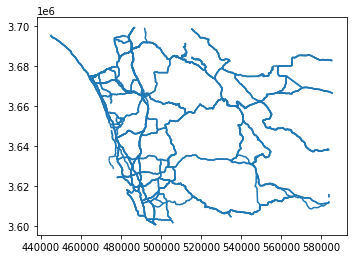

In [34]:
sdroads.plot()

## Buffer

In [35]:
sdroads.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
b1000 = sdroads.buffer(304.8)

<AxesSubplot:>

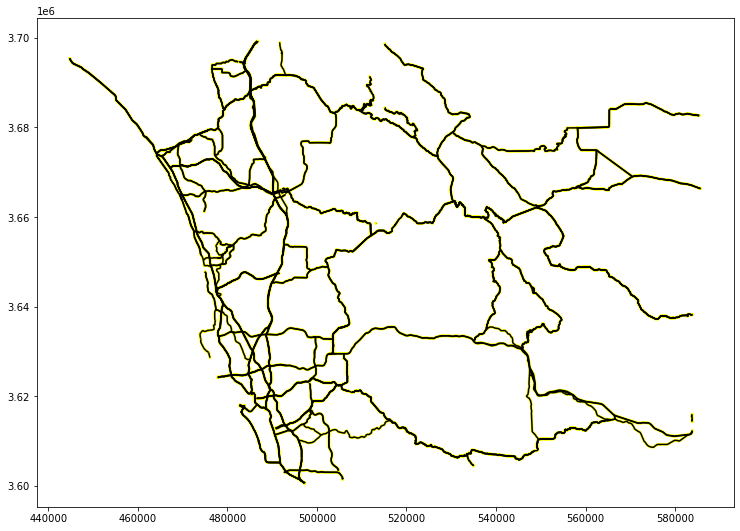

In [37]:
base = b1000.plot(color='yellow', figsize=(16, 9))
sdroads.plot(color='black', ax = base)

In [38]:
b1000uu = b1000.unary_union

In [39]:
b1000uu

## Areal interpolation

In [40]:
target = geopandas.GeoDataFrame(geometry=[b1000uu])

In [41]:
target.head()

geometry
0  MULTIPOLYGON (((497611.499 3600688.693, 497621...

In [42]:
target.area

0    9.938290e+08
dtype: float64

In [43]:
import tobler

In [44]:
extensive_variables = ['n_total_pop', 'n_nonhisp_white_persons', 'n_hispanic_persons', 'n_nonhisp_black_persons']

In [45]:
estimates = tobler.area_weighted.area_interpolate(source_df=gdf2010,
                                                  target_df=target,
                                                  extensive_variables=extensive_variables,
                                                  allocate_total=False)

Source and target dataframes have different crs. Please correct.


In [46]:
target.crs 

In [47]:
target.crs = gdf2010.crs

In [48]:
estimates = tobler.area_weighted.area_interpolate(source_df=gdf2010,
                                                  target_df=target,
                                                  extensive_variables=extensive_variables,
                                                  allocate_total=False)

In [49]:
estimates

n_total_pop  n_nonhisp_white_persons  n_hispanic_persons  \
0  734036.629698            334071.356956       271896.031176   

   n_nonhisp_black_persons                                           geometry  
0             32811.696134  MULTIPOLYGON (((497611.499 3600688.693, 497621...

In [50]:
gdf2010[extensive_variables].sum()

n_total_pop                3100500.0
n_nonhisp_white_persons    1502635.0
n_hispanic_persons          992087.0
n_nonhisp_black_persons     148249.0
dtype: float64

In [51]:
estimates.sum() / gdf2010[extensive_variables].sum()

n_total_pop                0.236748
n_nonhisp_white_persons    0.222324
n_hispanic_persons         0.274065
n_nonhisp_black_persons    0.221328
dtype: float64

In [52]:
target.explore()

## 500 ft buffer

In [53]:
b500 = sdroads.buffer(304.8/2)

In [54]:
target = geopandas.GeoDataFrame(geometry=[b500.unary_union], crs=sdroads.crs)

In [55]:
estimates500 = tobler.area_weighted.area_interpolate(source_df=gdf2010,
                                                  target_df=target,
                                                  extensive_variables=extensive_variables,
                                                  allocate_total=False)

estimates500.sum()

n_total_pop                395420.458759
n_nonhisp_white_persons    178085.160330
n_hispanic_persons         148787.156154
n_nonhisp_black_persons     17512.985865
dtype: float64

In [56]:
estimates500.sum()/estimates.sum() # of those within 1000 ft, how many are within 500 ft?

n_total_pop                0.538693
n_nonhisp_white_persons    0.533075
n_hispanic_persons         0.547221
n_nonhisp_black_persons    0.533742
dtype: float64

In [57]:
estimates500.sum()/gdf2010[extensive_variables].sum()

n_total_pop                0.127534
n_nonhisp_white_persons    0.118515
n_hispanic_persons         0.149974
n_nonhisp_black_persons    0.118132
dtype: float64

In [58]:
(estimates500.sum()/gdf2010[extensive_variables].sum()) * gdf2010[extensive_variables].sum()

n_total_pop                395420.458759
n_nonhisp_white_persons    178085.160330
n_hispanic_persons         148787.156154
n_nonhisp_black_persons     17512.985865
dtype: float64